In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid-data.csv')
df # shows the dataset 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306318,ZWE,Africa,Zimbabwe,2023-04-22,264632.0,2.0,3.571,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306319,ZWE,Africa,Zimbabwe,2023-04-23,264637.0,5.0,3.857,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306320,ZWE,Africa,Zimbabwe,2023-04-24,264639.0,2.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306321,ZWE,Africa,Zimbabwe,2023-04-25,264639.0,0.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
df.shape   #shows the number of rows and columns in the dataset

(306323, 67)

In [4]:
df.head() # shows 5 rows by default but if we specify a number within the paranthesis then it will print that number of rows

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
df.describe(include = 'all') # this gives the summary of the data such as mean , std, freq , etc.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,306323,291744,306323,306323,2.701970e+05,2.974650e+05,2.962010e+05,2.496860e+05,297583.000000,296353.000000,...,175633.000000,116194.000000,209511.000000,281682.000000,230062.000000,3.063230e+05,1.066900e+04,10669.000000,10669.000000,10669.000000
unique,255,6,255,1218,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1217,68971,1217,255,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.624784e+06,1.089369e+04,1.093778e+04,7.978386e+04,97.146615,97.532818,...,32.912503,50.794483,3.098422,73.721688,0.722573,1.284131e+08,4.739668e+04,9.538903,12.633550,1477.149682
std,NaN,NaN,NaN,NaN,3.521146e+07,1.038825e+05,1.011084e+05,4.127434e+05,605.511688,596.227021,...,13.571848,31.956518,2.549096,7.396827,0.148999,6.606917e+08,1.384241e+05,12.914011,26.344219,1840.907839
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-1984.281600
25%,NaN,NaN,NaN,NaN,6.389000e+03,0.000000e+00,1.143000e+00,1.190000e+02,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,2.780000e+01,0.560000,-1.200000,24.645111
50%,NaN,NaN,NaN,NaN,6.118800e+04,1.800000e+01,3.914300e+01,1.209000e+03,0.000000,0.286000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,4.530999e+03,7.750000,6.490000,900.418500
75%,NaN,NaN,NaN,NaN,6.281160e+05,5.410000e+02,6.440000e+02,1.044800e+04,6.000000,6.857000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.159700e+04,15.360000,18.070000,2399.257000


In [6]:
# this is used to rename the columns in the data set to whatever name u want them to be 
df.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)

In [7]:
df

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306318,ZWE,Africa,Zimbabwe,2023-04-22,264632.0,2.0,3.571,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306319,ZWE,Africa,Zimbabwe,2023-04-23,264637.0,5.0,3.857,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306320,ZWE,Africa,Zimbabwe,2023-04-24,264639.0,2.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306321,ZWE,Africa,Zimbabwe,2023-04-25,264639.0,0.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
continent_unique = list(df.Continent.unique())

continent_unique

# this helps to identify all the continents that are affected by covid-19

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [9]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)


In [10]:
df3 = df2.groupby(['Date','Country',])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()

In [11]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Afghanistan,missing_value,missing_value,missing_value
...,...,...,...,...,...
306318,2023-05-02,South Korea,missing_value,missing_value,missing_value
306319,2023-05-02,Sweden,missing_value,missing_value,missing_value
306320,2023-05-02,Upper middle income,missing_value,missing_value,5414678062.0
306321,2023-05-02,Uruguay,missing_value,missing_value,9017284.0


In [12]:
df3['total_cases'].replace({'missing_value': 0}, inplace =True)
df3['total_deaths'].replace({'missing_value': 0}, inplace =True)
df3['total_vaccinations'].replace({'missing_value': 0}, inplace =True)

#to convert all the missing_value to 0 

In [13]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Afghanistan,0.0,0.0,0.000000e+00
...,...,...,...,...,...
306318,2023-05-02,South Korea,0.0,0.0,0.000000e+00
306319,2023-05-02,Sweden,0.0,0.0,0.000000e+00
306320,2023-05-02,Upper middle income,0.0,0.0,5.414678e+09
306321,2023-05-02,Uruguay,0.0,0.0,9.017284e+06


In [14]:
df4 = df3 [df3['total_deaths']>1000000]

In [15]:
countries = df4['Country'].unique()
len(countries)

10

In [16]:
morethan1mil = list(df4.Country.unique())
morethan1mil

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

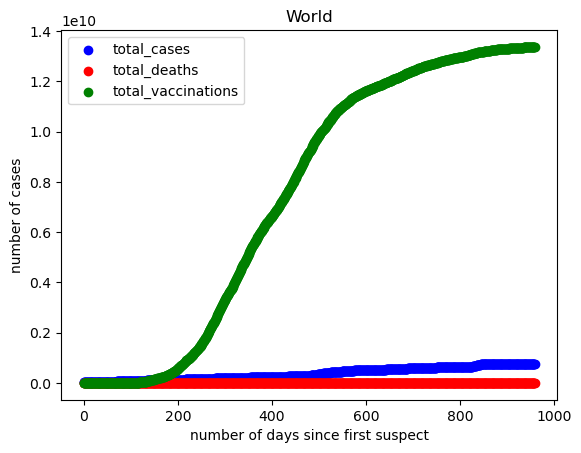

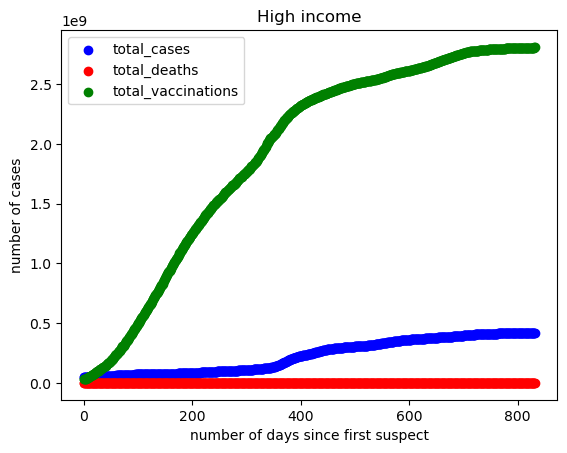

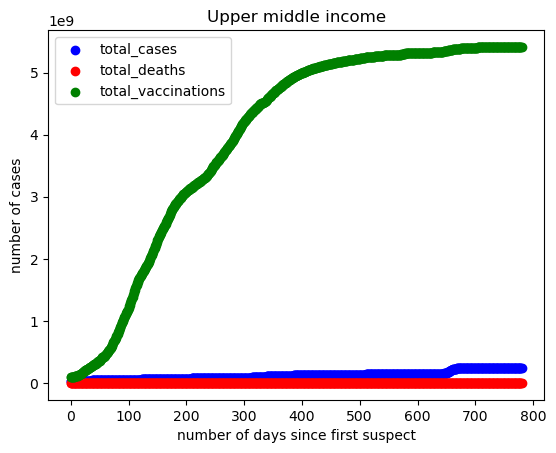

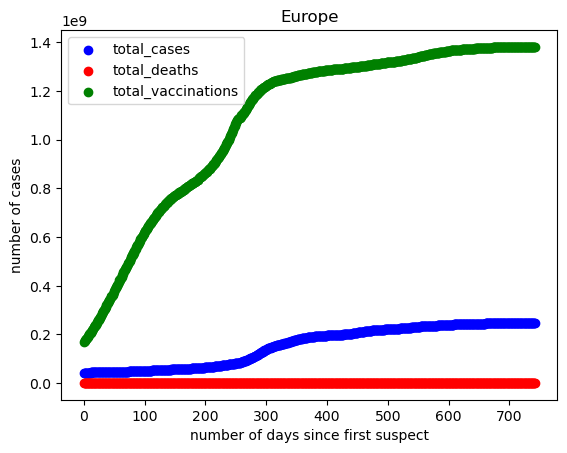

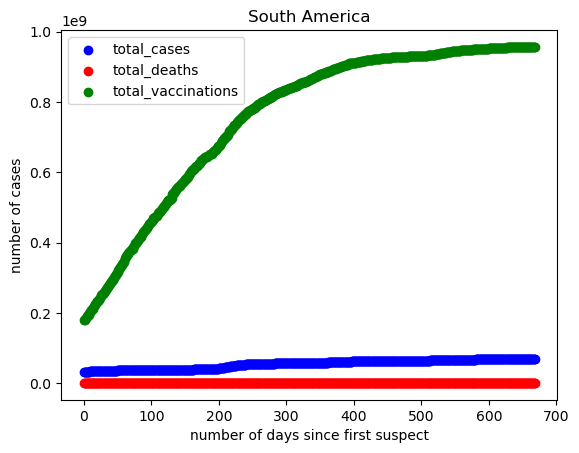

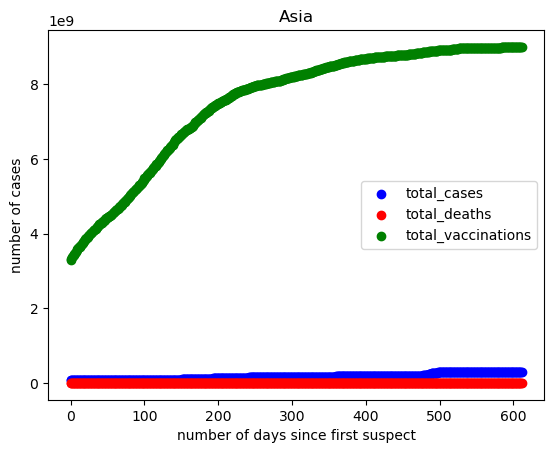

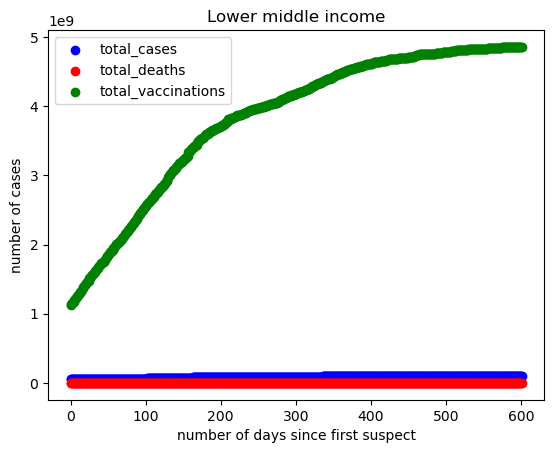

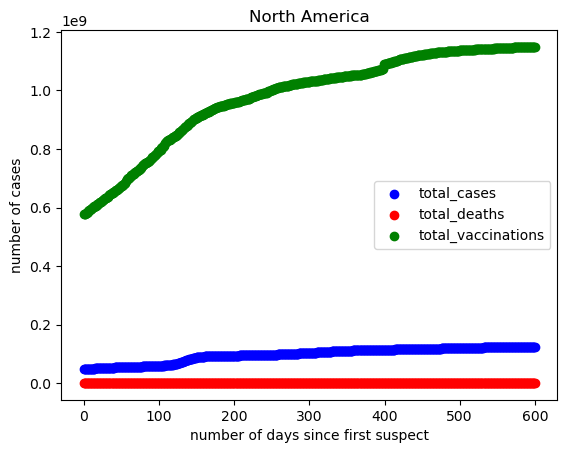

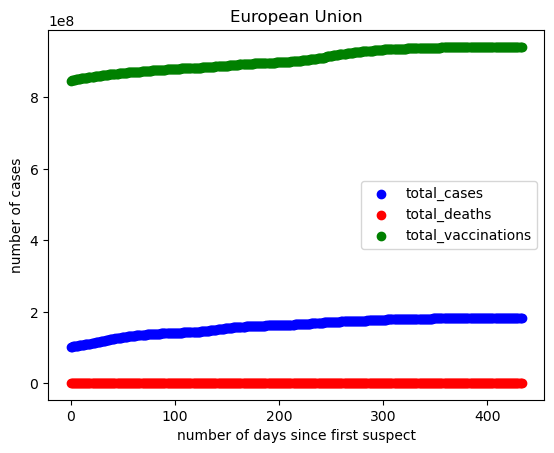

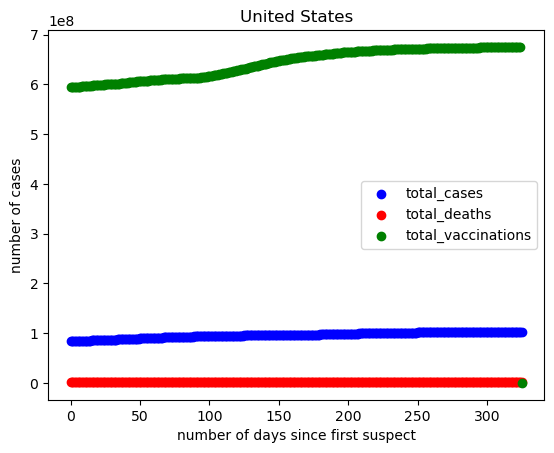

In [17]:
for idx in range(0,len(countries)):
    C = df4[df4['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color = 'blue',label='total_cases')
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color = 'red',label='total_deaths')
    plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color = 'green',label='total_vaccinations')
    plt.title(countries[idx])
    plt.xlabel("number of days since first suspect")
    plt.ylabel("number of cases")
    plt.legend()
    plt.show()
    

In [18]:
df5 = df4.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index()

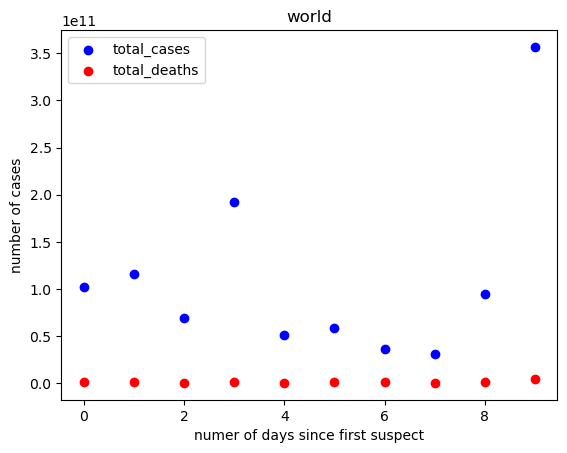

In [19]:
C = df5
plt.scatter(np.arange(0,len(C)),C['total_cases'],color = 'blue',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color = 'red',label='total_deaths')
plt.title("world")
plt.xlabel("numer of days since first suspect")
plt.ylabel("number of cases")
plt.legend()
plt.show()

In [20]:
date = df4['Date'].unique()
len(date)

960

In [22]:
df6 = df4.groupby(['Date'])[['Date','total_cases','total_deaths']].sum().reset_index()



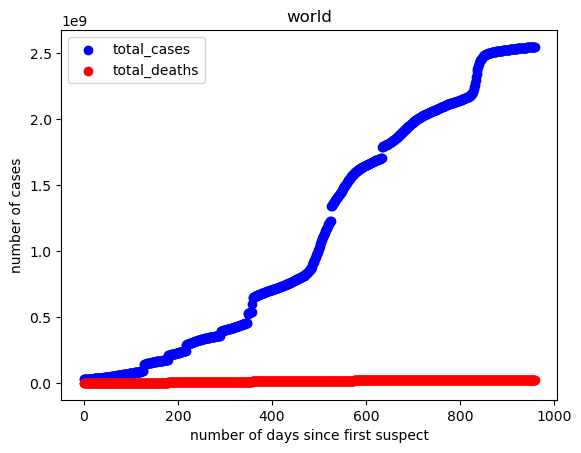

In [23]:
C = df6
plt.scatter(np.arange(0,len(C)),C['total_cases'],color = 'blue',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color = 'red',label='total_deaths')
plt.title("world")
plt.xlabel("number of days since first suspect")
plt.ylabel("number of cases")
plt.legend()
plt.show()

